In [166]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import mode

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Tornar o retorno do Notebook idêntico a cada execução
np.random.seed(42)

In [167]:
# Caminho para o arquivo JSON
file_path = './datasets/Classification/small.json'

# Carregar o arquivo JSON
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [168]:
# Converter os dados JSON em um DataFrame do pandas
questoes = pd.DataFrame(data)

# Utilizar .head() para visualizar as primeiras linhas do DataFrame
questoes.head()

,question,area
0,Qual a diferença entre adjetivos e advérbios n...,Português
1,Como se classificam as orações coordenadas e s...,Português
2,O que são pronomes relativos e como são utiliz...,Português
3,Qual é a regra para o uso de crase na língua p...,Português
4,Como identificar e corrigir a colocação pronom...,Português


In [169]:
questoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  320 non-null    object
 1   area      320 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [170]:
print(questoes['area'].value_counts())

area
Português                20
Literatura               20
Redação                  20
Biologia                 20
Geografia                20
Matemática               20
Física                   20
História                 20
Química                  20
Inglês                   20
Espanhol                 20
Filosofia                20
Sociologia               20
História da Arte         20
Orientação de Estudos    20
Ensino Religioso         20
Name: count, dtype: int64


In [171]:
X = questoes['question']  # As features que estamos usando para prever, neste caso, o texto das questões
y = questoes['area']  # O target, neste caso, a área/disciplina da questão

# Converter texto em TF-IDF e definir pipelines
pipeline_random_forest = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
pipeline_svm = make_pipeline(TfidfVectorizer(), SVC(random_state=42))
pipeline_gb = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier(random_state=42))

cv_scores_rf = cross_val_score(pipeline_random_forest, X, y, cv=5, scoring='accuracy')
cv_scores_rf_mean = cv_scores_rf.mean()
cv_scores_rf_std = cv_scores_rf.std()

cv_scores_svm = cross_val_score(pipeline_svm, X, y, cv=5, scoring='accuracy')
cv_scores_svm_mean = cv_scores_svm.mean()
cv_scores_svm_std = cv_scores_svm.std()

cv_scores_gb = cross_val_score(pipeline_gb, X, y, cv=5, scoring='accuracy')
cv_scores_gb_mean = cv_scores_gb.mean()
cv_scores_gb_std = cv_scores_gb.std()

In [172]:
print(f'Accuracy scores for Random Forest: {cv_scores_rf}')
print(f'Mean Accuracy for Random Forest: {cv_scores_rf_mean:.3f}')
print(f'Standard Deviation of for Random Forest: {cv_scores_rf_std:.3f}')

print('-------------------------------------------------------------------------')
    
print(f'Accuracy scores for SVM: {cv_scores_svm}')
print(f'Mean Accuracy for SVM: {cv_scores_svm_mean:.3f}')
print(f'Standard Deviation of for SVM: {cv_scores_svm_std:.3f}')

print('-------------------------------------------------------------------------')

print(f'Accuracy scores for GB: {cv_scores_gb}')
print(f'Mean Accuracy for GB: {cv_scores_gb_mean:.3f}')
print(f'Standard Deviation of for GB: {cv_scores_gb_std:.3f}')

Accuracy scores for Random Forest: [0.578125 0.578125 0.640625 0.515625 0.578125]
Mean Accuracy for Random Forest: 0.578
Standard Deviation of for Random Forest: 0.040
-------------------------------------------------------------------------
Accuracy scores for SVM: [0.71875  0.71875  0.6875   0.625    0.703125]
Mean Accuracy for SVM: 0.691
Standard Deviation of for SVM: 0.035
-------------------------------------------------------------------------
Accuracy scores for GB: [0.640625 0.46875  0.59375  0.59375  0.65625 ]
Mean Accuracy for GB: 0.591
Standard Deviation of for GB: 0.066


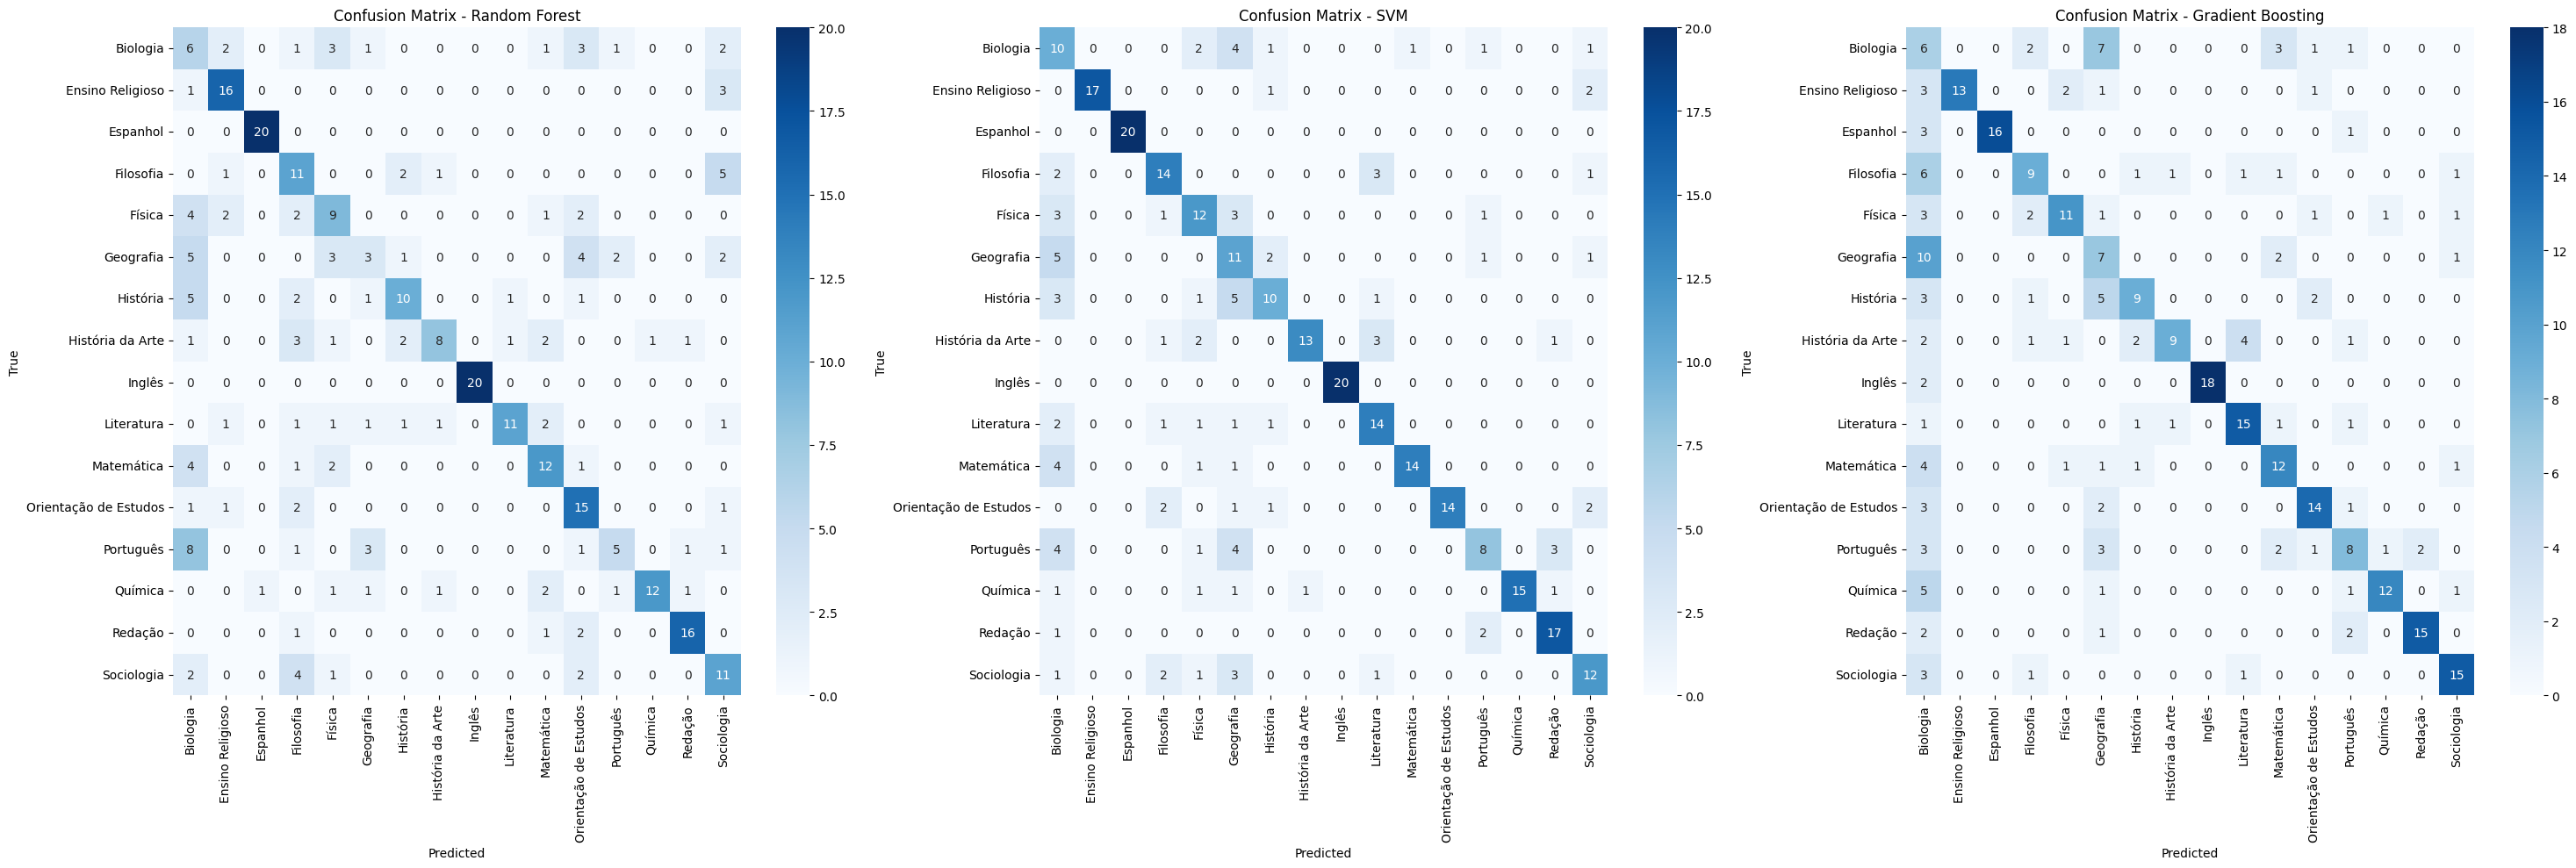

In [173]:
# Obter previsões usando validação cruzada
y_pred_cv_random_forest = cross_val_predict(pipeline_random_forest, X, y, cv=5)
y_pred_cv_svm = cross_val_predict(pipeline_svm, X, y, cv=5)
y_pred_cv_gb = cross_val_predict(pipeline_gb, X, y, cv=5)

# Calcular as matrizes de confusão para cada modelo
conf_matrix_cv_rf = confusion_matrix(y, y_pred_cv_random_forest)
conf_matrix_cv_svm = confusion_matrix(y, y_pred_cv_svm)
conf_matrix_cv_gb = confusion_matrix(y, y_pred_cv_gb)

# Configurar os subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Títulos para os subplots
titles = ['Random Forest', 'SVM', 'Gradient Boosting']

# Lista de matrizes de confusão para iterar
conf_matrices = [conf_matrix_cv_rf, conf_matrix_cv_svm, conf_matrix_cv_gb]

for ax, conf_matrix, title in zip(axes.flat, conf_matrices, titles):
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax,
                xticklabels=categorias, yticklabels=categorias)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix - {title}')

plt.tight_layout()
plt.show()

In [174]:
# Definir o pipeline para o modelo
# pipeline_gb = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('gb', GradientBoostingClassifier(random_state=42))
# ])

# Definir o grid de parâmetros para o Gradient Boosting
# param_grid_gb = {
#     'gb__n_estimators': [100, 200],
#     'gb__learning_rate': [0.1, 0.01],
#     'gb__max_depth': [3, 5]
# }

# Configurar o GridSearchCV
# grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy')

# Realizar a busca
# grid_search_gb.fit(X, y)

# print("Melhores parâmetros para Gradient Boosting:")
# print(grid_search_gb.best_params_)
# print(f"Melhor score de cross-validation: {grid_search_gb.best_score_:.3f}")

In [175]:
# Definir o pipeline para o modelo
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(random_state=42))
])

# Definir o grid de parâmetros para o SVM
param_grid_svm = {
    'svm__C': [1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Configurar o GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')

# Realizar a busca
grid_search_svm.fit(X, y)

print("Melhores parâmetros para SVM:")
print(grid_search_svm.best_params_)
print(f"Melhor score de cross-validation: {grid_search_svm.best_score_:.3f}")

Melhores parâmetros para SVM:
{'svm__C': 10, 'svm__kernel': 'rbf'}
Melhor score de cross-validation: 0.719


In [178]:
# Configurar os pipelines com os parâmetros otimizados
pipeline_gb_optimized = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42))
])

pipeline_svm_optimized = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(C=10, kernel='rbf', random_state=42, probability=True))
])

In [179]:
# Salvar o modelo para testes com input personalizado
# Treinar com todo o conjunto
pipeline_random_forest.fit(X, y)
pipeline_svm_optimized.fit(X, y)
pipeline_gb_optimized.fit(X, y)

# Salvar os pipelines completos
with open('randomForestPipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_random_forest, file)
with open('SVMPipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_svm_optimized, file)
with open('GBPipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_gb_optimized, file)